Virtual Competition

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

Importing libraries

In [52]:
import pandas as pd 
import numpy as np                     
import seaborn as sns                   
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,precision_score,confusion_matrix

Reading the data file

In [2]:
data=pd.read_csv('train_ctrUa4K.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

Total of 614 rows and 13 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Checking the number of unique values in each column

In [5]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some missing values in Gender, Married, Dependents,Self employed , Loan amount , Loan amount term and credit history

Taking care of missing values

Filling mising values for categorical columns

In [7]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [8]:
data['Married'].fillna(data['Married'].mode()[0], inplace=True)

In [9]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

In [10]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

In [11]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [12]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

filling missing values for Numerical columns with median

In [13]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

In [14]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [15]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All missing values are handled

In [16]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


CHecking the data

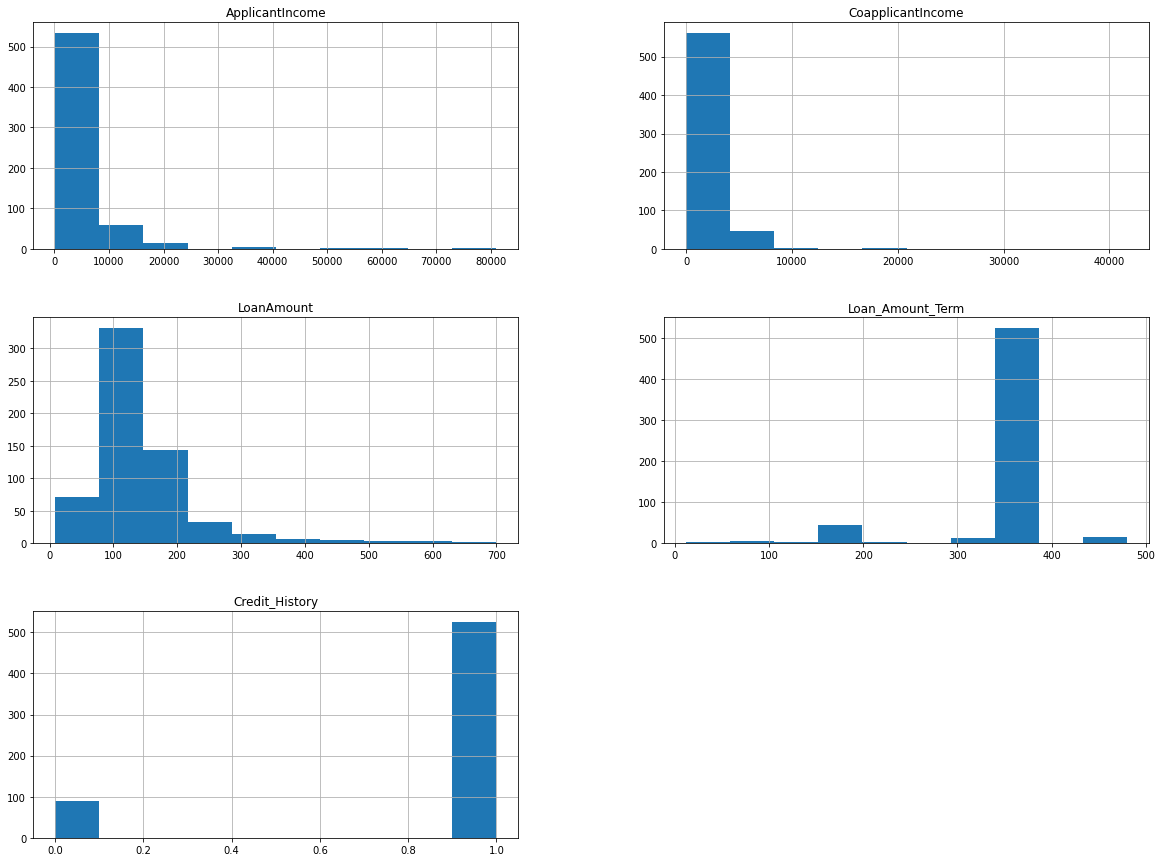

In [18]:
data.hist(figsize=(20,15))
plt.show()

Most of the loan aplicants are having less income.
Majority is having credit history.
Most of the loans are in 100 category.

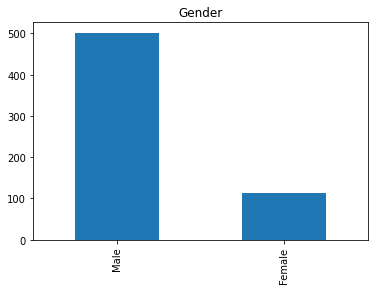

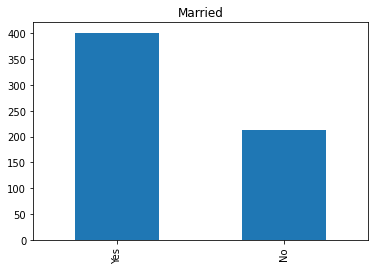

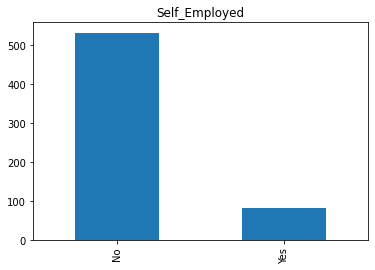

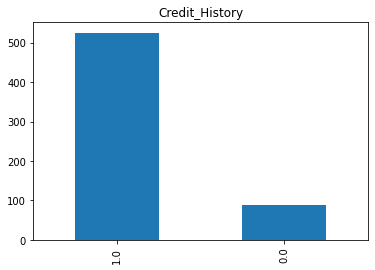

In [19]:
for i in ['Gender','Married','Self_Employed','Credit_History']:
  data[i].value_counts().plot.bar(title=i)
  plt.show()

Compared to female, males are applying for loan more.
Most of the applicants are married.
The self emloyed applicants are very less.

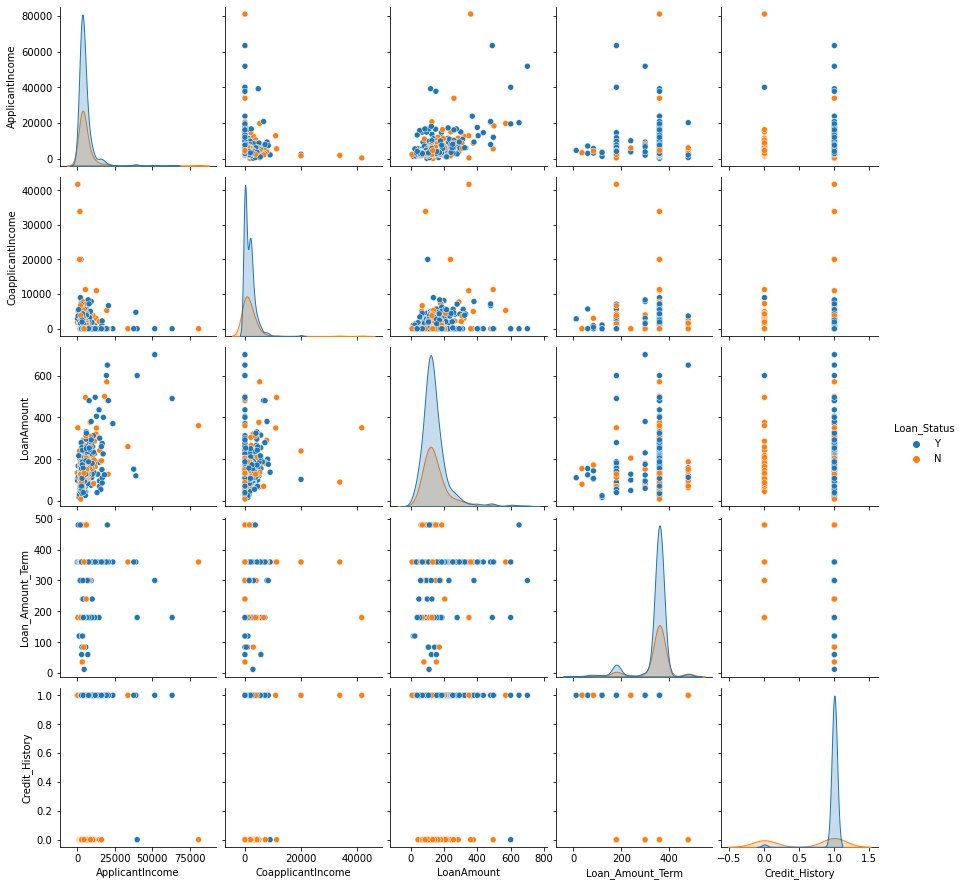

In [20]:
sns.pairplot(data,hue='Loan_Status')

In [21]:
y=data['Property_Area'].value_counts()
print(y)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<Axes: >

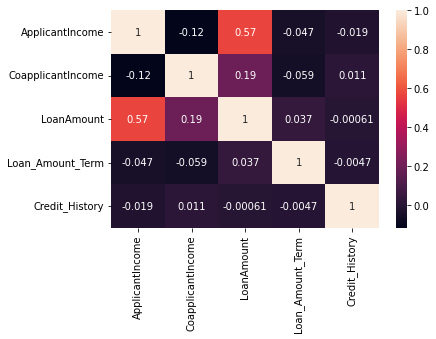

In [22]:
sns.heatmap(data.corr(),annot=True)

Setting the training variable

In [23]:
x=data.drop(['Loan_ID','Loan_Status'],axis=1)
y=data['Loan_Status']
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [24]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [25]:
LE=LabelEncoder()
for i in ['Gender','Married','Education','Dependents','Self_Employed']:
  x[i]=LE.fit_transform(x[i])
x=pd.get_dummies(x)
x.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,0,0,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,0,0,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,0,1,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,0,0,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,0,1,0


In [26]:
x.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,0,0,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,0,0,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,0,1,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,0,0,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,0,1,0


In [27]:
y=LE.fit_transform(y)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

Using Logistic Regression model

In [29]:
LR=LogisticRegression()
LR=LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print('Logistic Regression accuracy = ',accuracy_score(y_pred,y_test))

Logistic Regression accuracy =  0.7621951219512195


Using KNN model

In [30]:
KNN=KNeighborsClassifier().fit(x_train,y_train)
y_pred1=KNN.predict(x_test)
print('KNN Accuracy = ',accuracy_score(y_pred1,y_test))

KNN Accuracy =  0.6504065040650406


Using Decision Tree

In [31]:
DT=DecisionTreeClassifier().fit(x_train,y_train)
y_pred2=DT.predict(x_test)
print('Decision Tree accuracy = ',accuracy_score(y_pred2,y_test))

Decision Tree accuracy =  0.676829268292683


Using Random Forest

In [32]:
RF=RandomForestClassifier().fit(x_train,y_train)
y_pred3=RF.predict(x_test)
print('Random forest Accuracy = ',accuracy_score(y_pred3,y_test))

Random forest Accuracy =  0.7804878048780488


The highest accuracy was given by Random forest

Doing Hyperparameter testing for Random forest

In [33]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int (x) for x in np.linspace(start=200,stop=2000,num=10) ]
max_features =['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,1000,10)]
min_samples_split=[2,5,10,12,15]
min_samples_leaf=[1,2,3,4,5,6]
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'criterion':['entropy','gini']
             }

In [34]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)

In [35]:
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10, 12, 15],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [36]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 1000,
 'criterion': 'gini'}

In [54]:
best_random_grid=rf_randomcv.best_estimator_

In [55]:
y_pred4=best_random_grid.predict(x_test)

In [56]:
accuracy_score(y_pred4,y_test)

0.7987804878048781

Grid Search CV

In [57]:
param_grid={'n_estimators': [rf_randomcv.best_params_['n_estimators'],
                              rf_randomcv.best_params_['n_estimators']+100,
                               rf_randomcv.best_params_['n_estimators']-100],
             'max_features': [rf_randomcv.best_params_['max_features']],
             'max_depth': [rf_randomcv.best_params_['max_depth']],
             'min_samples_split':[rf_randomcv.best_params_['min_samples_split'],
                                   rf_randomcv.best_params_['min_samples_split']+1,
                                    rf_randomcv.best_params_['min_samples_split']+2,
                                     rf_randomcv.best_params_['min_samples_split']-1,
                                      rf_randomcv.best_params_['min_samples_split']-2],
             'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                                   rf_randomcv.best_params_['min_samples_leaf']+1,
                                    rf_randomcv.best_params_['min_samples_leaf']+2],
             'criterion': [rf_randomcv.best_params_['criterion']]
             }

In [58]:
grid_search = GridSearchCV(estimator=rf,param_grid = param_grid,cv=10,n_jobs=-1,verbose=2)

grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [1000],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [12, 13, 14, 11, 10],
                         'n_estimators': [1400, 1500, 1300]},
             verbose=2)

In [59]:
best_grid_search=grid_search.best_estimator_
best_grid_search

RandomForestClassifier(max_depth=1000, max_features='auto', min_samples_leaf=2,
                       min_samples_split=12, n_estimators=1300)

In [60]:
y_pred5=best_grid_search.predict(x_test)

In [61]:
accuracy_score(y_pred5,y_test)

0.8008130081300813

The accuracy increased to 0.8 after hyperparameter testing

Reading the test file

In [37]:
test_data=pd.read_csv('test_lAUu6dG.csv')

In [38]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Checking the null values

In [40]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Filling the null values

In [41]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)

In [42]:
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)

In [43]:
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)

In [44]:
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(), inplace=True)

In [45]:
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)

In [46]:
test_data['Credit_History'].fillna(test_data['Credit_History'].median(), inplace=True)

Creating the test variable

In [47]:
y_test1=test_data.drop('Loan_ID',axis=1)
y_test1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Label encoding the variables

In [48]:
for i in ['Gender','Married','Education','Dependents','Self_Employed']:
  y_test1[i]=LE.fit_transform(y_test1[i])
y_test1=pd.get_dummies(y_test1)
y_test1.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,0,0,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,0,0,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,0,0,1
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,0,0,1
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,0,0,1
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,0,0,1
6,0,0,1,1,0,2226,0,59.0,360.0,1.0,0,1,0
7,1,1,2,1,0,3881,0,147.0,360.0,0.0,1,0,0
8,1,1,2,0,0,13633,0,280.0,240.0,1.0,0,0,1
9,1,0,0,1,0,2400,2400,123.0,360.0,1.0,0,1,0


In [62]:
y_pred_sub=best_grid_search.predict(y_test1)
y_pred_sub

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

Writing the predicted values to CSV

In [63]:
submission=pd.read_csv('submission_49d68Cx.csv')

In [65]:
submission['Loan_Status'] = y_pred_sub
submission.to_csv('sample_submission.csv', index=False)
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})
submission.to_csv('sample_submission.csv', index=False)